# Проект: Принятие решений в бизнесе

**Доброго времени суток! Меня зовут Айнур, тут часто спрашивают про «ты»/«вы», я рад любому формату.**

В данном проекте я выстыпаю аналитиком крупного интернет-магазина. 

**Цель** - увеличить выручку с помощью гипотез.

Можно выделить следующие **задачи**:
- ознакомление с данными и предобработка;
- добавление функций в проект;
- приоритизация гипотез
- оценка окупаемости рекламы.

Сами пункты включают в себя подпункты. В данном проекте представлено три датасета.

    **P.S.** под строками кода я буду оставлять свои комментарии и делать небольшие выводы в таком формате: **<font color="green">Комментарий:<font>** 

## Первая часть проекта

In [1]:
import pandas as pd
from scipy import stats as st
from math import factorial, sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('max_colwidth', 130)
import datetime as dt
import scipy.stats as stats
from datetime import datetime, timedelta
#pd.set_option('display.float_format', '{:.2f}'.format)

**<font color="green">Комментарий:<font>** Импортирование библиотек.

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')
hypo.columns = hypo.columns.str.lower()
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**<font color="green">Комментарий:<font>** Прочтение первого файла и ознакомление с гипотезами. Всего представлено 9 гипотез.

**<font color="green">Комментарий:<font>** С помощью метода ICE найдем и отсортируем наиболее важные гипотезы

In [3]:
hypo['ICE'] = round(hypo['impact'] * hypo['confidence'] / hypo['efforts'], 2)
display(hypo[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**<font color="green">Комментарий:<font>** Можно сделать вывод, что 9, 1 и 8 гипотеза являются наиболее значимыми гипотезами для проверки. 4, 2 и 3 наименее значимыми.
    
Рассмотрим приоритизацию тех же гипотез с помощью способа RICE.

In [4]:
hypo['RICE'] = hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['efforts']
display(hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**<font color="green">Комментарий:<font>** Восьмая и первая гипотеза также остаются в тройке лидеров. А вот 9 гипотеза упала на 5 строчку по приоритету. В целом не произошло сильного изменения по приоритизации. Каждая гипотеза изменилась относительно себя на 1-2 пункта от способа ICE. 
    
Основная **причина отличия** двух фреймворков - сложность и более детальная процедура оценивания у **RICE**.  Когда у нас больше данных о гипотезах и хотим использовать более объективные критерии.

**<font color="green">Комментарий:<font>** Гипотезы - "Добавить форму подписки на все основные страницы", "Добавить блоки рекомендаций товаров на сайт интернет магазина" и "Добавить два новых канала привлечения трафика" можно выделить как наиболее приоритетные для исследования.

## Вторая часть проекта

### Загрузка и предобработка данных

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
display(orders)
display(visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**<font color="green">Комментарий:<font>** Прочтение двух остальных файлов и первое визуальное ознакомление.
    
Рассмотрим каждый датасет поподробнее.

In [6]:
orders.info()
print()
print(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

0


**<font color="green">Комментарий:<font>** Пропуски и явные дубликаты в датафрейме orders отсутствуют. Столбец с датами в формате object.

In [7]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorId, Length: 1031, dtype: int64

In [8]:
wsx = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

In [9]:
orders = orders.query('visitorId not in @wsx')

**<font color="green">Комментарий:<font>** В датасете присутствуют пользователи, которые находятся в обеих группах.

**<font color="green">Комментарий:<font>** Как лучше поступить? Стоит ли удалить их из всего датасета или продолжить работу, зная, что группы неравны? Насколько это критично?

<div class="alert alert-info"> <b>Комментарий №2:</b> Удалим пользователей, которые попали в обе группы.

In [10]:
print('Минимальная исследуемая дата:', orders['date'].min())
print()
print('Максимальная исследуемая дата:', orders['date'].max())

Минимальная исследуемая дата: 2019-08-01

Максимальная исследуемая дата: 2019-08-31


**<font color="green">Комментарий:<font>** Диапозон исследования - **август 2019 года.**

In [11]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

**<font color="green">Комментарий:<font>**. Разница в медиане и среднем, а также большое значение максимального значения показывает наличие аномальных значений в столбце `revenue`

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
print('Минимальная исследуемая дата:', visitors['date'].min())
print()
print('Максимальная исследуемая дата:', visitors['date'].max())

Минимальная исследуемая дата: 2019-08-01

Максимальная исследуемая дата: 2019-08-31


In [14]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

**<font color="green">Комментарий:<font>** Пропуски в датафрейме **visitors** отсутсвуют. Даты совпадают, аномальные значения в количестве посетителей не обнаружены.

### График кумулятивной выручки по группам.

**<font color="green">Комментарий:<font>** Создадим датафрейм с кумулятивной выручкой по дням и группам A/B-тестирования: 

In [15]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId'\
: 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [16]:
print('Минимальная исследуемая дата:', cumulativeData['date'].min())
print()
print('Максимальная исследуемая дата:', cumulativeData['date'].max())

Минимальная исследуемая дата: 2019-08-01 00:00:00

Максимальная исследуемая дата: 2019-08-31 00:00:00


<div class="alert alert-info"> <b>Комментарий №2:</b> Даты в новом датафрейме совпадают с исходным.

**<font color="green">Комментарий:<font>** Построим график:

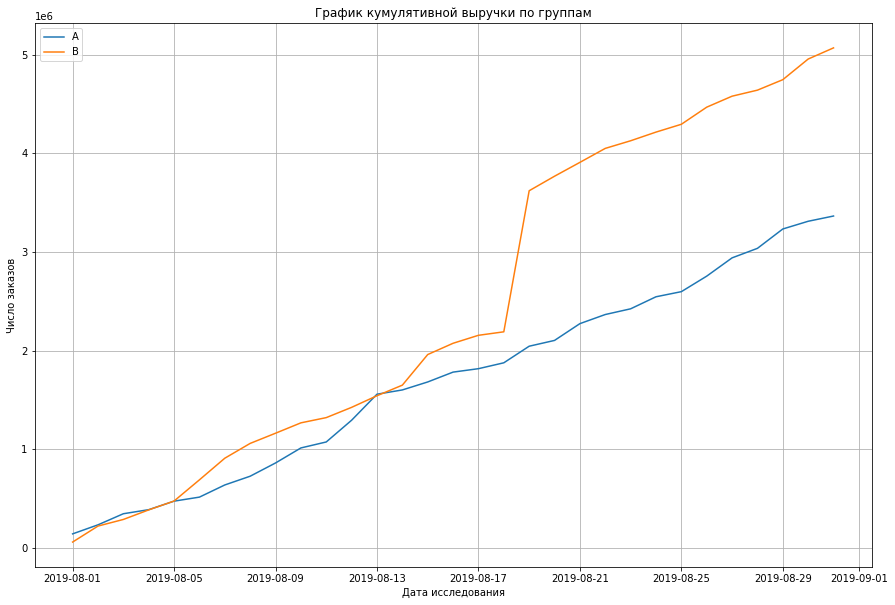

In [17]:
plt.figure(figsize=(15, 10))
plt.xlabel('Дата исследования')
plt.grid()
plt.ylabel('Число заказов')
plt.title('График кумулятивной выручки по группам')

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

**<font color="green">Комментарий:<font>** Начиная с 13 июля группа 'B' показывает результаты лучше, чем группа 'А', в промежутке 2019-08-18 по 2019-08-20 происходит резкий скачок в группе 'B', что может сигнализировать о аномальных заказах. Также отметим, что выручка увеличивается на протяжении всего теста

<div class="alert alert-info"> <b>Комментарий №2:</b> Основная причина аномальных значений - пользователи, которые совершили бОльшое количество заказов и/или потратили на заказы намного больше. Такие значения выделяются на графиках или различных статистиках. В дальнейшем нужно найти крайние значения и продолжить аналитику без них, чтобы получить результаты, которые помогут бизнесу.

### График кумулятивного среднего чека по группам

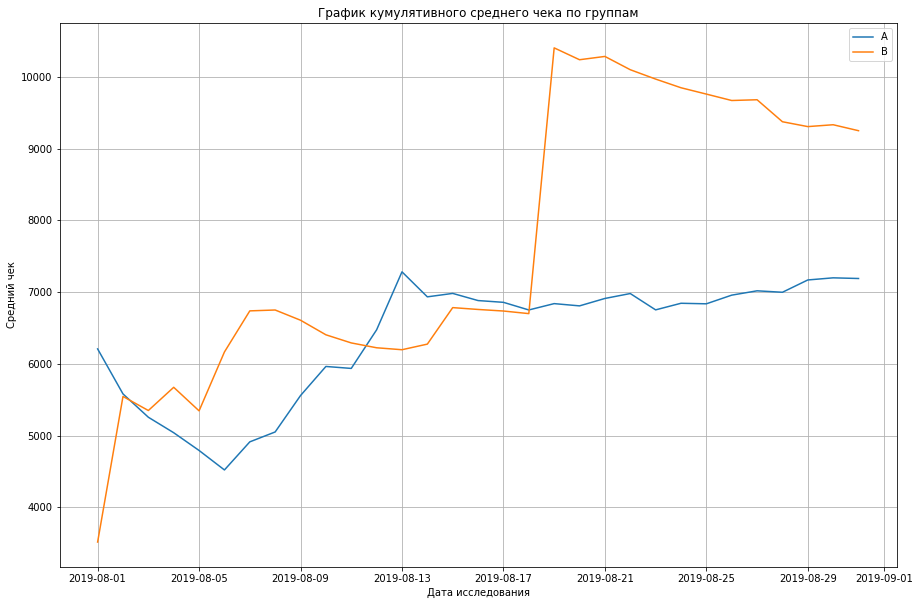

In [18]:
plt.figure(figsize=(15, 10))
plt.xlabel('Дата исследования')
plt.grid()
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

**<font color="green">Комментарий:<font>** Аналогичные выводы можно сделать и по среднему чеку, группа 'B' лидирует, но в тот же промежуток времени происходит резкий "бум". Также обе группы на протяжении всего теста показывают увеличивающуюся метрику среднего чека. После 20 июля обе группы становятся равномерными.

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

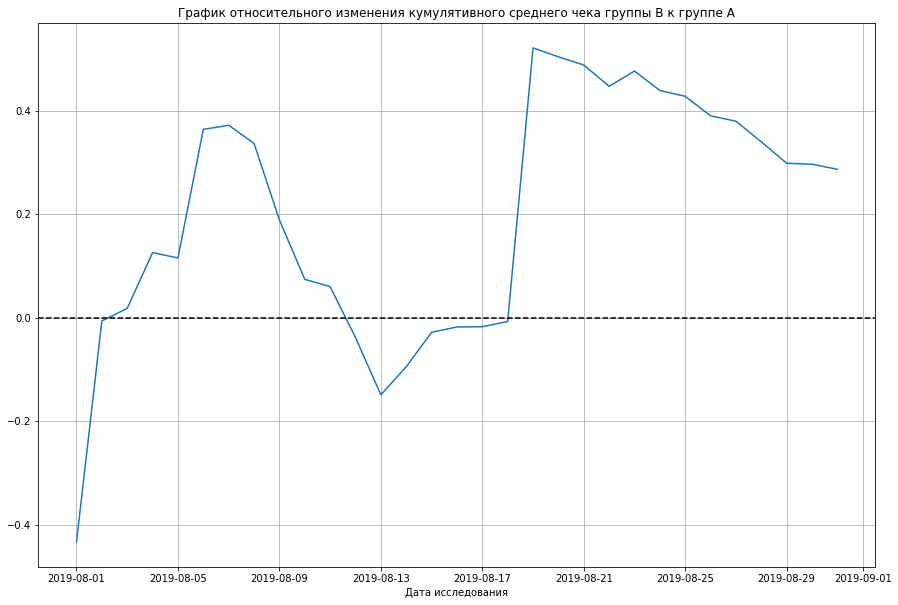

In [20]:
plt.figure(figsize=(15, 10))
plt.xlabel('Дата исследования')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']\
/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**<font color="green">Комментарий:<font>** На графике есть резкие колебания в нескольких точках, что может говорить об аномальных значениях.

### График кумулятивного среднего количества заказов на посетителя по группам

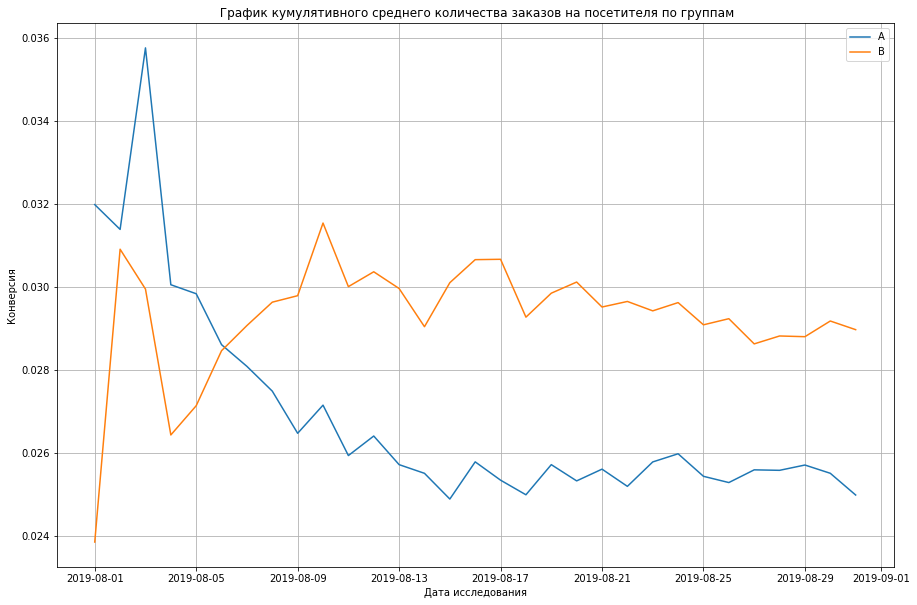

In [21]:
plt.figure(figsize=(15, 10))
plt.xlabel('Дата исследования')
plt.ylabel('Конверсия')
plt.grid()
plt.title(' График кумулятивного среднего количества заказов на посетителя по группам')

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

**<font color="green">Комментарий:<font>** Первые дни для обеих групп были неравномерными, что можно списать на начало теста. После 10 июля начинается более равномерное количество заказов для обеих групп, показатели группы 'B' немного привлекательнее.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

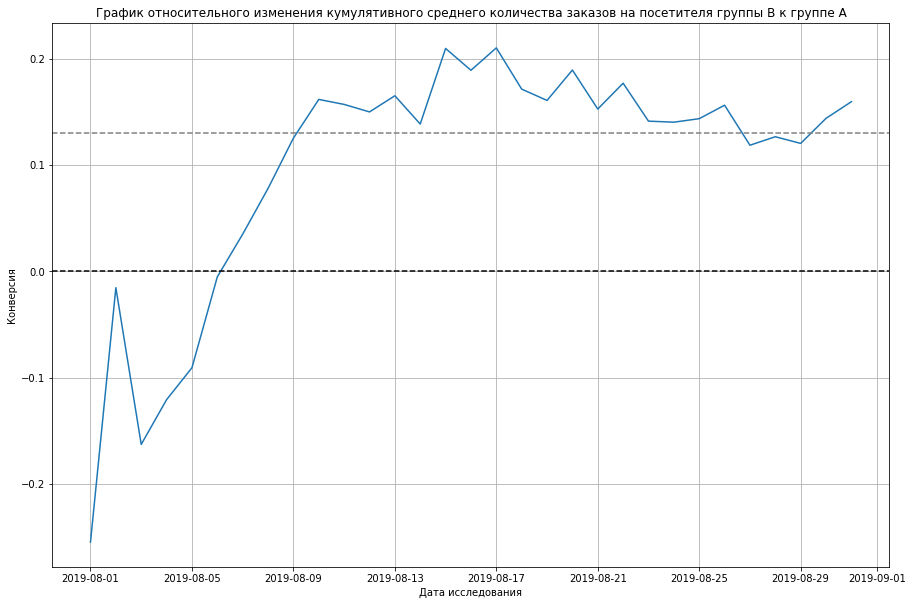

In [22]:
plt.figure(figsize=(15, 10))
plt.xlabel('Дата исследования')
plt.grid()
plt.ylabel('Конверсия')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],\
mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1);

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.13, color='grey', linestyle='--');

**<font color="green">Комментарий:<font>** График колеблется на начале теста, после 10 числа становится более равномерным.

### График количества заказов по пользователям

In [23]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


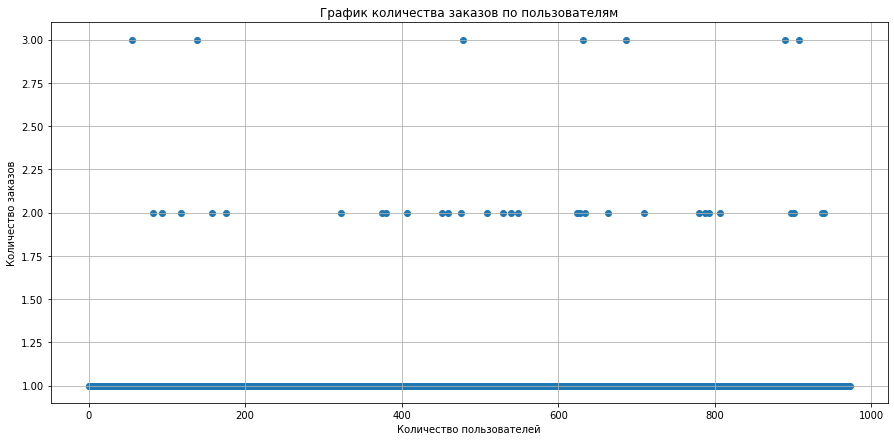

In [24]:
plt.figure(figsize=(15, 7))
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям')
plt.grid()

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);

**<font color="green">Комментарий:<font>** Большинство пользователей заказавали один раз, также значительная доля - 2 раза.

### 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([1., 2.])

**<font color="green">Комментарий:<font>** 95% пользователей заказывали до двух раз включительно. Всё, что больше 3 уже аномальные значения, которые могут искожать реальную картину.
    
Выберем 3 заказа как границу количества заказов.

### Точечный график стоимостей заказов

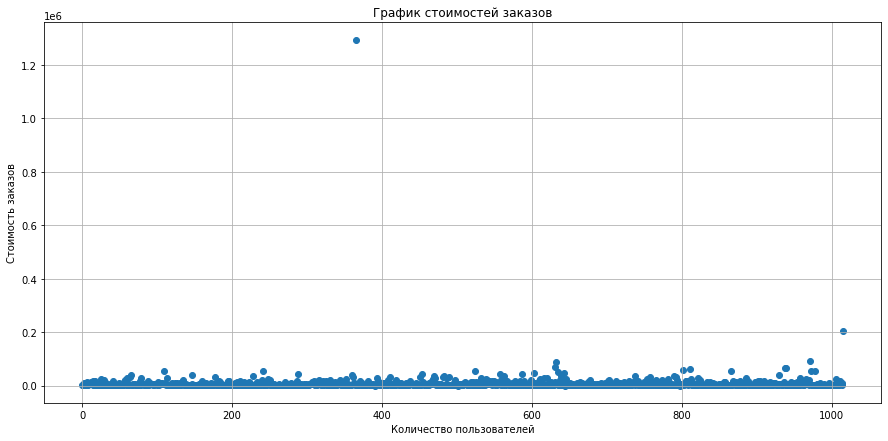

In [26]:
plt.figure(figsize=(15, 7))
plt.xlabel('Количество пользователей')
plt.grid()
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов')

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

**<font color="green">Комментарий:<font>** На графике присутствуют аномальный заказ, рассмотрим данные без данного заказа:

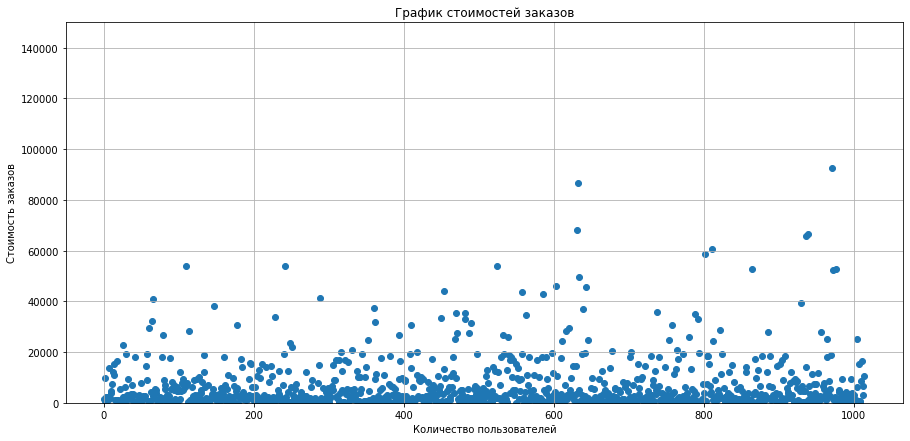

In [27]:
plt.figure(figsize=(15, 7))
plt.xlabel('Количество пользователей')
plt.grid()
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов')

plt.ylim(0, 150000)

plt.scatter(x_values, orders['revenue'])

plt.show()

**<font color="green">Комментарий:<font>** Большинство заказов стоимостью < 40000, рассмотрим с помощью перцентилей:

### 95-й и 99-й перцентили стоимости заказов

In [28]:
print(np.percentile(orders['revenue'], [95, 98, 99])) 

[26785. 42353. 53904.]


**<font color="green">Комментарий:<font>** Определим границу по 98 перцентилю в 44133.2

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**<font color="green">Комментарий:<font>** Проверем есть ли разница между данными без удаления аномальных значений и с очищенными данными.

**H0** - различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.

**H1** - различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

Для всех тестов выберем значение уровня статистической значимости - 0.05

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

**<font color="green">Комментарий:<font>** Подготавливаем данные.
    
Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
    
Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [31]:
alpha = 0.05

In [32]:
# Применим критерий Манна-Уитни.
print('p-значение:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
print()
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение: 0.011

Отвергаем нулевую гипотезу

0.160


**<font color="green">Комментарий:<font>** **P-value** < уровня статистической значимости, значит отвергаем гипотезу.
                                                           
Относительный выигрыш **группы B** равен 16% — второе число в выводе.                                                           
                                                               
Сделаем вывод, что есть разница в среднем количестве заказов на посетителя между группами                                                           

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**<font color="green">Комментарий:<font>** Рассмотрим на различия в среднем чеке по необработанным данным.

**H0** - различий в среднем чеке нет.

**H1** - различия в среднем чеке есть.

In [33]:
print('p-значение:','{0:.3f}'\
.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print()
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
print()
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.829

Не получилось отвергнуть нулевую гипотезу

0.287


**<font color="green">Комментарий:<font>** **P-value** > уровня статистической значимости, значит нет оснований отвергнуть гипотезу.
                                                           
Относительный выигрыш **группы B** равен 28.7% — второе число в выводе.                                                           
                                                               
Сделаем вывод, что различия в среднем чеке между группами незначительны, следовательно они были получены случайно.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**<font color="green">Комментарий:<font>** **P-value** Подготовим данные. Возьмём границу заказов >3 и сумму больше 44133.2

**H0** - различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.

**H1** - различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >= 44133.2]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
1137    759473111
949     887908475
744     888512513
709     950626008
Name: userId, dtype: int64
18


In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [36]:
print('p-значение:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
print()
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.007

Отвергаем нулевую гипотезу

0.175


**<font color="green">Комментарий:<font>** **P-value** < уровня статистической значимости, значит отвергаем гипотезу.
                                                           
Относительный выигрыш **группы B** равен 17.5% — второе число в выводе.                                                           
                                                               
Сделаем вывод, что есть разница в среднем количестве заказов на посетителя между группами по "очищенным" данным.      

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**<font color="green">Комментарий:<font>** Проверим различия в среднем чеке по очищенным данным.

**H0** - различий в среднем чеке нет.

**H1** - различия в среднем чеке есть.

In [37]:
print('p-значение:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print()
print('Не получилось отвергнуть нулевую гипотезу')
print()
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение: 0.895

Не получилось отвергнуть нулевую гипотезу

0.028


**<font color="green">Комментарий:<font>** **P-Value** > 0.05
    
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными. По разнице средних чеков групп различий практически нет. Относительное различие составляет 28% между сегментами и не являются значимыми при alpha = 0.05, значит можно сделать аналогичный вывод, как в прошлой проверке гипотезы о среднем чеке => наблюдаемые значения были получены случайно.

## Вывод

Из доступных данных интернет-магазина можно сделать следующие выводы и рекомендации.


**Приоритизация гипотез**

Следует обратить внимание на **гипотезы**:

1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

Если при составлении приоритета гипотез, она должна включать в себя **охват пользователей**, то следует обратить взор на данные гипотезы:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	56.0
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	


**Анализ А/В тест:**

График относительного изменения кумулятивной конверсии группы B к группе A показывает нам , что в группе 'B' результаты лучше группы 'А'.

Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по «сырым», так и по "очищенным". Конверсия группы 'В' выше, чем в 'А'.

Касаемо среднего чека, то значимых различий - нет, данный результат актуален и при данных с аномалиями, и при данных без них;

По результатам теста следует прекратить его и зафиксировать победу группы 'B'.